In [1]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp

Tratamiento Eda de los Database de Vino y Viñedos obtenidos de la OIV España

In [2]:
print(os.getcwd())  # Muestra el directorio actual

e:\Proyecto_Somelier\EDAglobal


In [3]:
#importamos los archivos csv que vamos a utilizar de la Base de datos extraida de OIV en español para el análisis exploratorio de datos de los años 2013-2023
dfvino = pd.read_csv("E:\Proyecto_Somelier\EDAglobal\data\dataVino2023.csv")
dfvino.shape    #Muestra la cantidad de filas y columnas del archivo

(8364, 7)

In [4]:
dfvino24= pd.read_csv("E:\Proyecto_Somelier\EDAglobal\data\dataVino2024.csv") #corresponde solo a los datos del año 2024
dfvino24.shape  #muestra la cantidad de filas y columnas del archivo

(30, 7)

In [5]:
dfvinedo = pd.read_csv("E:\Proyecto_Somelier\EDAglobal\data\dataVinedo2023.csv")   #corresponde a los datos de terreno de viñedo de 2013-2023
dfvinedo.shape  #muestra la cantidad de filas y columnas del dataframe

(1041, 7)

In [6]:
print(dfvino.head())  #Muestra las columnas del dataframe

  Continent Region/Country Product       Variable  Year     Unit Quantity
0      Asia     Afganistán    Vino        Consumo  2013  1000 hl        1
1      Asia     Afganistán    Vino  Importaciones  2013  1000 hl        0
2      Asia     Afganistán    Vino     Producción  2013  1000 hl        0
3      Asia     Afganistán    Vino        Consumo  2014  1000 hl        1
4      Asia     Afganistán    Vino  Importaciones  2014  1000 hl        1


In [7]:
print(dfvinedo.head())  #Muestra las columnas del dataframe

  Continent Region/Country Product    Variable  Year Unit Quantity
0      Asia     Afganistán  Viñedo  Superficie  2013   ha   66 777
1      Asia     Afganistán  Viñedo  Superficie  2014   ha   84 285
2      Asia     Afganistán  Viñedo  Superficie  2015   ha   84 582
3      Asia     Afganistán  Viñedo  Superficie  2016   ha   88 634
4      Asia     Afganistán  Viñedo  Superficie  2017   ha   93 734


In [8]:
#para determinar la cantidad de datos nulos en el dataframe
print(dfvino.isnull().sum())  #Muestra la cantidad de datos nulos en cada columna del dataframe
print(dfvinedo.isnull().sum())  #Muestra la cantidad de datos nulos en cada columna del dataframe


Continent         0
Region/Country    0
Product           0
Variable          0
Year              0
Unit              0
Quantity          0
dtype: int64
Continent         0
Region/Country    0
Product           0
Variable          0
Year              0
Unit              0
Quantity          0
dtype: int64


In [9]:
print(dfvino['Variable'].unique())
print(dfvino['Product'].unique())
print(dfvinedo['Variable'].unique())
print(dfvinedo['Product'].unique())


['Consumo' 'Importaciones' 'Producción' 'Exportaciones']
['Vino']
['Superficie']
['Viñedo']


In [10]:
print(dfvino.dtypes)  #Muestra el tipo de datos de cada columna del dataframe
print(dfvinedo.dtypes)  #Muestra el tipo de datos de cada

Continent         object
Region/Country    object
Product           object
Variable          object
Year               int64
Unit              object
Quantity          object
dtype: object
Continent         object
Region/Country    object
Product           object
Variable          object
Year               int64
Unit              object
Quantity          object
dtype: object


In [11]:
# para corregir el espacio de separacion de miles de la columna 'Quantity'
dfvino['Quantity'] = dfvino['Quantity'].str.replace(' ', '', regex=False).astype(float)

In [12]:
dfvino['Quantity'] = pd.to_numeric(dfvino['Quantity'], errors='coerce')  #Convierte la columna Quantity a tipo de dato numerico

In [13]:
# para corregir el espacio de separacion de miles de la columna 'Quantity'
dfvinedo['Quantity'] = dfvinedo['Quantity'].str.replace(' ', '', regex=False).astype(float)

In [14]:
dfvinedo['Quantity'] = pd.to_numeric(dfvinedo['Quantity'], errors='coerce')  #Convierte la columna Quantity a tipo de dato numerico

In [15]:
print(dfvino.dtypes)  #Muestra el tipo de datos de cada columna del dataframe
#muestra los 5 valores mas altos de la columna Quantity
print(dfvino['Quantity'].nlargest(5))

Continent          object
Region/Country     object
Product            object
Variable           object
Year                int64
Unit               object
Quantity          float64
dtype: object
3999    54783.0
3979    54029.0
3991    50920.0
4011    50232.0
3987    49996.0
Name: Quantity, dtype: float64


In [16]:
dfvino24['Quantity'] = dfvino24['Quantity'].str.replace(' ', '', regex=False).astype(float)
dfvino24['Quantity'] = pd.to_numeric(dfvino24['Quantity'], errors='coerce')  #Convierte la columna Quantity a tipo de dato numerico
print(dfvino24["Quantity"].nlargest(5))

17    41000.0
13    36910.0
11    33603.0
12    23559.0
1     10869.0
Name: Quantity, dtype: float64


## Análisis de la producción de vino en el mundo, la ultima decada 2023-2013

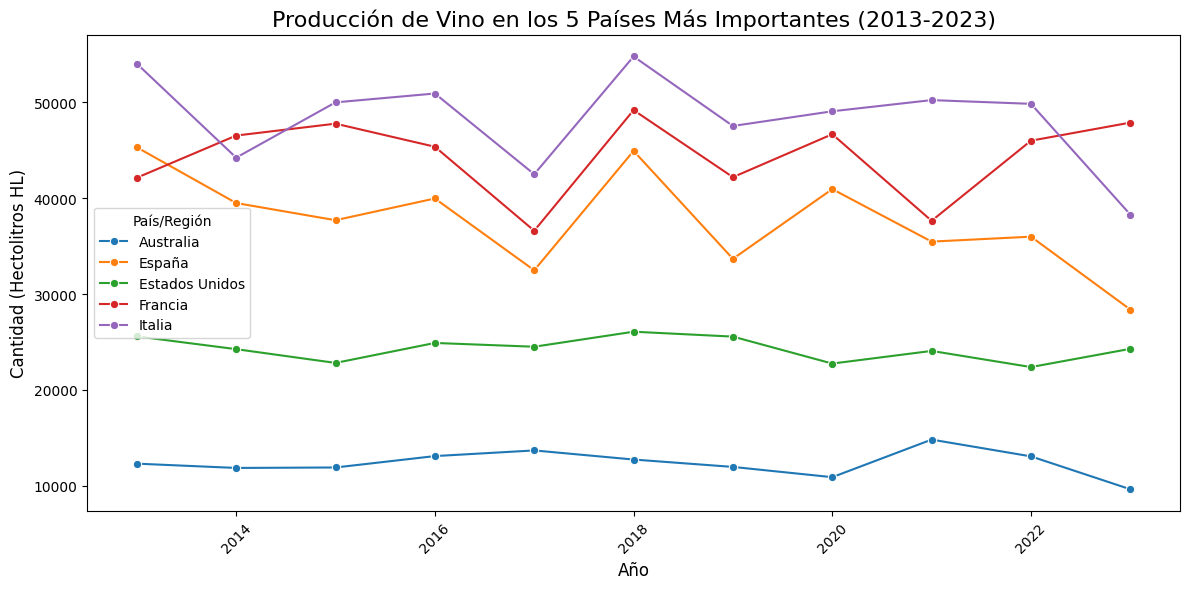

In [17]:
# Filtrar los datos de producción de vino
produccion_vino = dfvino[dfvino['Variable'] == 'Producción']

# Filtrar los datos de la última década (2013-2023)
produccion_vino_decada = produccion_vino[produccion_vino['Year'] >= 2013]

# Identificar los 5 países más importantes en producción de vino que se mantienen constantes en la última década
top_5_paises_produccion = (produccion_vino_decada.groupby('Region/Country')['Quantity']
                           .sum()
                           .sort_values(ascending=False)
                           .head(5)
                           .index)

# Filtrar los datos para estos 5 países
produccion_top_5 = produccion_vino_decada[produccion_vino_decada['Region/Country'].isin(top_5_paises_produccion)]

# Crear un gráfico de líneas para mostrar la producción de vino en estos 5 países a lo largo de la última década
plt.figure(figsize=(12, 6))
sns.lineplot(data=produccion_top_5, x='Year', y='Quantity', hue='Region/Country', marker='o')

# Configurar el gráfico
plt.title('Producción de Vino en los 5 Países Más Importantes (2013-2023)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad (Hectolitros HL)', fontsize=12)
plt.legend(title='País/Región', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Analizar la relación entre el terreno cultivado y la cantidad producida por región y continente

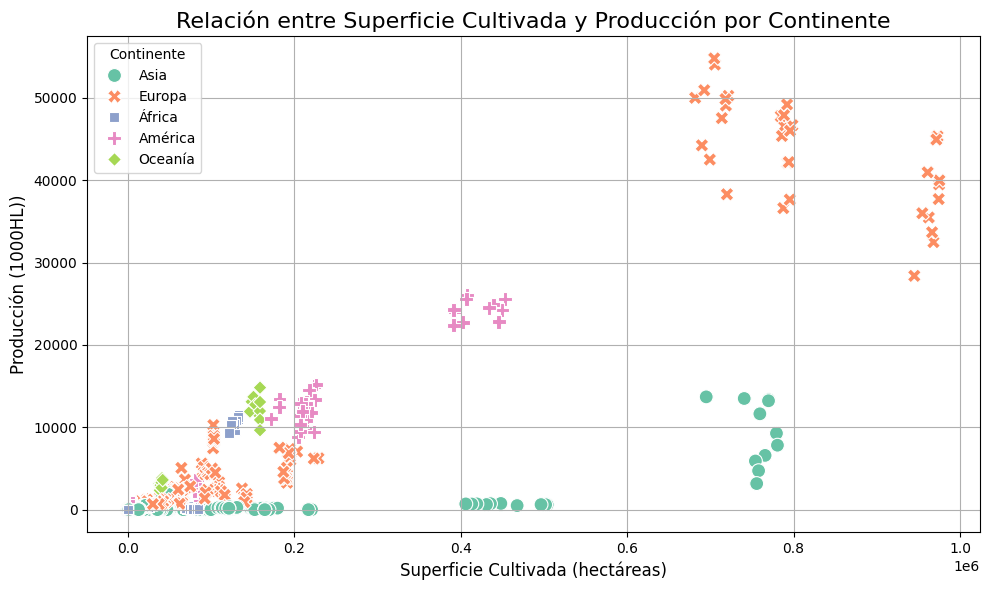

Correlaciones entre Superficie y Producción por Continente:
Continent            
América    Superficie    0.988196
Asia       Superficie    0.772375
Europa     Superficie    0.953804
Oceanía    Superficie    0.975806
África     Superficie    0.741307
Name: Producción, dtype: float64


In [18]:
# Filtrar datos relevantes: Superficie cultivada y Producción
df_superficie = dfvinedo[dfvinedo['Variable'] == 'Superficie'].rename(columns={'Quantity': 'Superficie'})
df_produccion = dfvino[dfvino['Variable'] == 'Producción'].rename(columns={'Quantity': 'Producción'})

# Combinar ambos conjuntos de datos en uno solo, usando las claves comunes
df_merged = pd.merge(
    df_superficie[['Continent', 'Region/Country', 'Year', 'Superficie']],
    df_produccion[['Continent', 'Region/Country', 'Year', 'Producción']],
    on=['Continent', 'Region/Country', 'Year'],
    how='inner'
)

# Convertir a valores numéricos si es necesario (por ejemplo, si los datos son cadenas)
df_merged['Superficie'] = pd.to_numeric(df_merged['Superficie'], errors='coerce')
df_merged['Producción'] = pd.to_numeric(df_merged['Producción'], errors='coerce')

# Calcular la eficiencia como Producción/Superficie
df_merged['Eficiencia'] = df_merged['Producción'] / df_merged['Superficie']

# Agrupar por región o continente para calcular estadísticas
eficiencia_por_region = df_merged.groupby(['Continent', 'Region/Country'])[['Superficie', 'Producción', 'Eficiencia']].mean().reset_index()

# Calcular la correlación entre superficie y producción por continente
correlacion_por_continente = df_merged.groupby('Continent')[['Superficie', 'Producción']].corr().iloc[0::2, -1]

# Visualizar la relación con un scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_merged,
    x='Superficie',
    y='Producción',
    hue='Continent',
    style='Continent',
    palette='Set2',
    s=100
)

# Configurar el gráfico
plt.title('Relación entre Superficie Cultivada y Producción por Continente', fontsize=16)
plt.xlabel('Superficie Cultivada (hectáreas)', fontsize=12)
plt.ylabel('Producción (1000HL))', fontsize=12)
plt.legend(title='Continente', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir correlaciones
print("Correlaciones entre Superficie y Producción por Continente:")
print(correlacion_por_continente)


Interpretación de Correlaciones:

Correlaciones cercanas a 1 indican que una mayor superficie cultivada está fuertemente relacionada con una mayor producción (alta dependencia) para los continentes América, Europa y Oceania. Coincidiendo con los mayores productores de Vino a nivel Mundial segun el Top 5 de productores: Italia, Francia, España, Estados Unidos y Australia


Enfoque para realizar el análisis de tendencia de consumo clasificando los Top 5 países por año y comparando su consumo con importaciones y producción

<Figure size 1400x800 with 0 Axes>

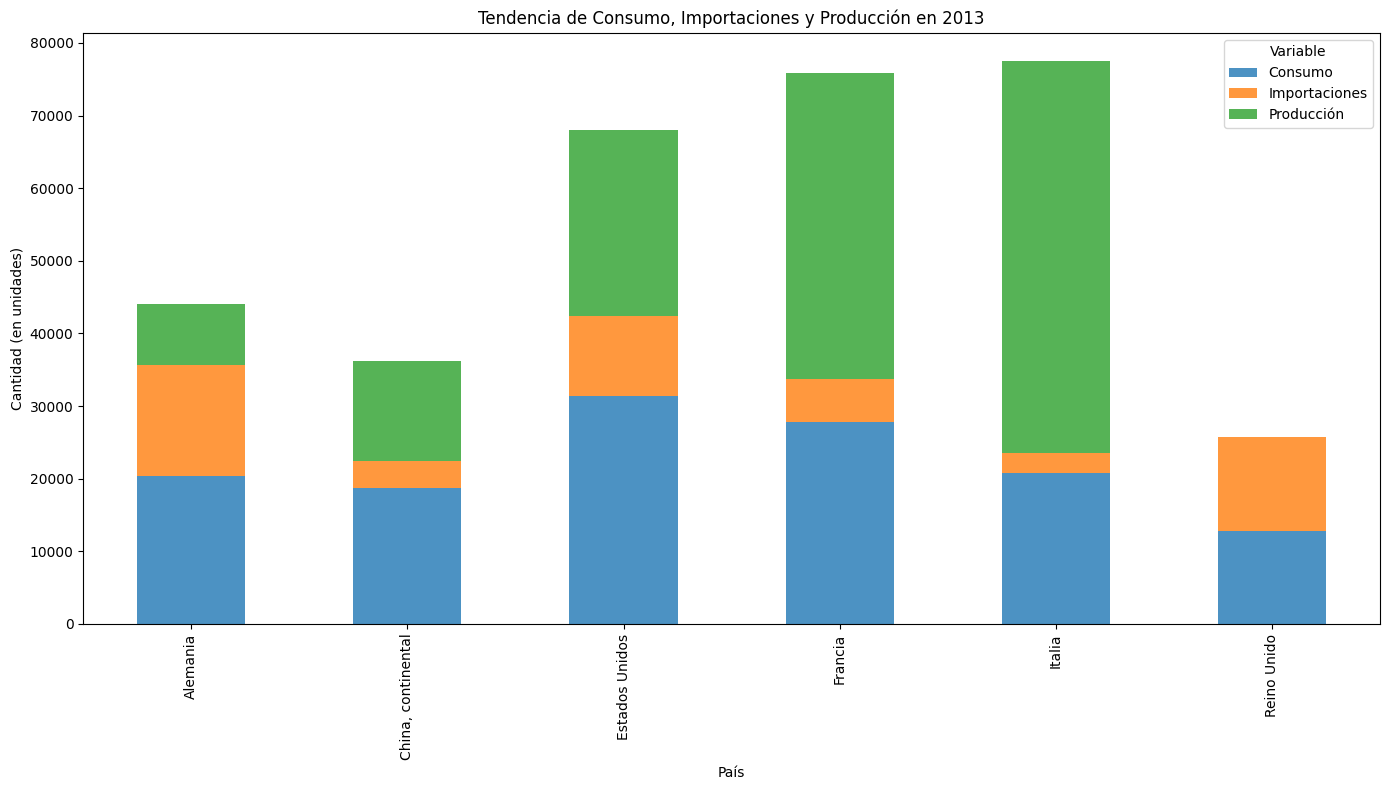

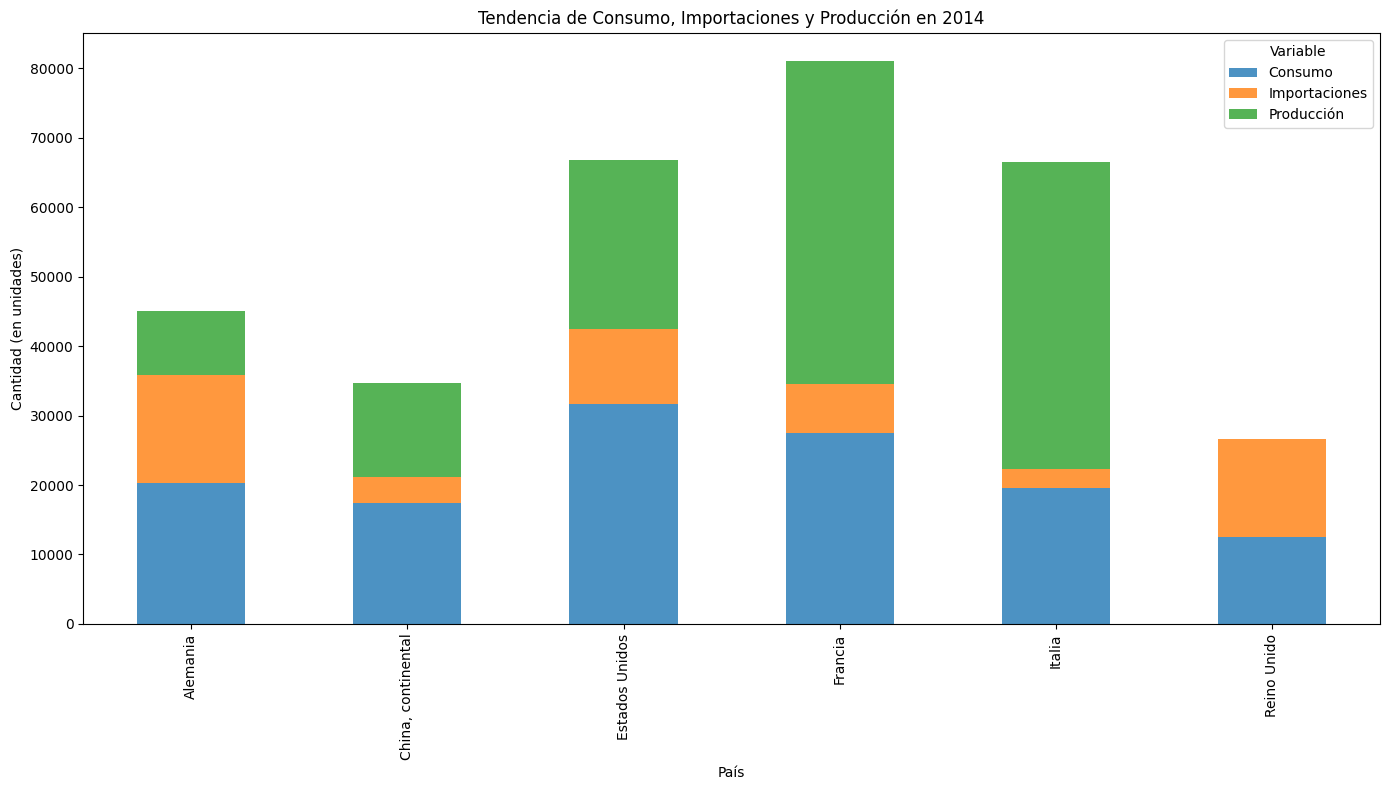

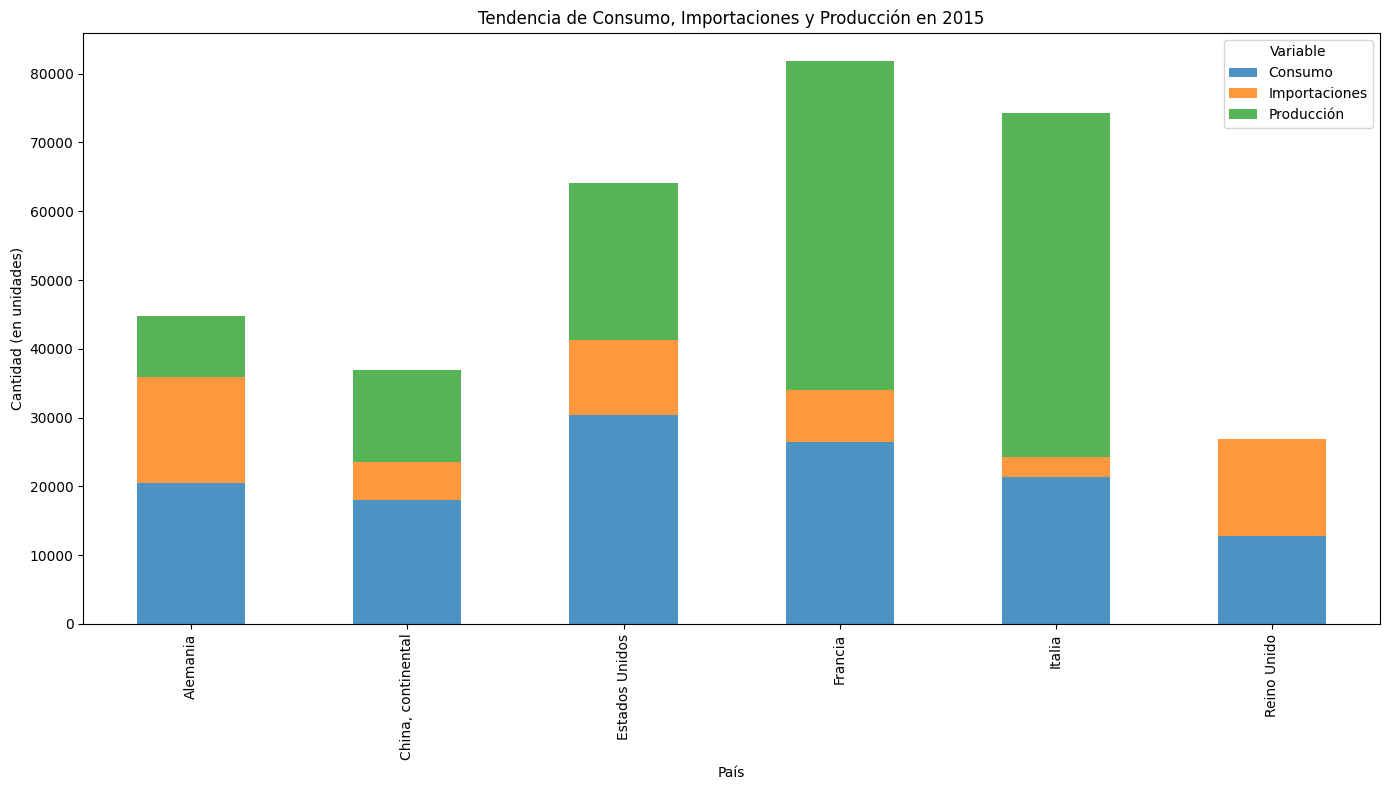

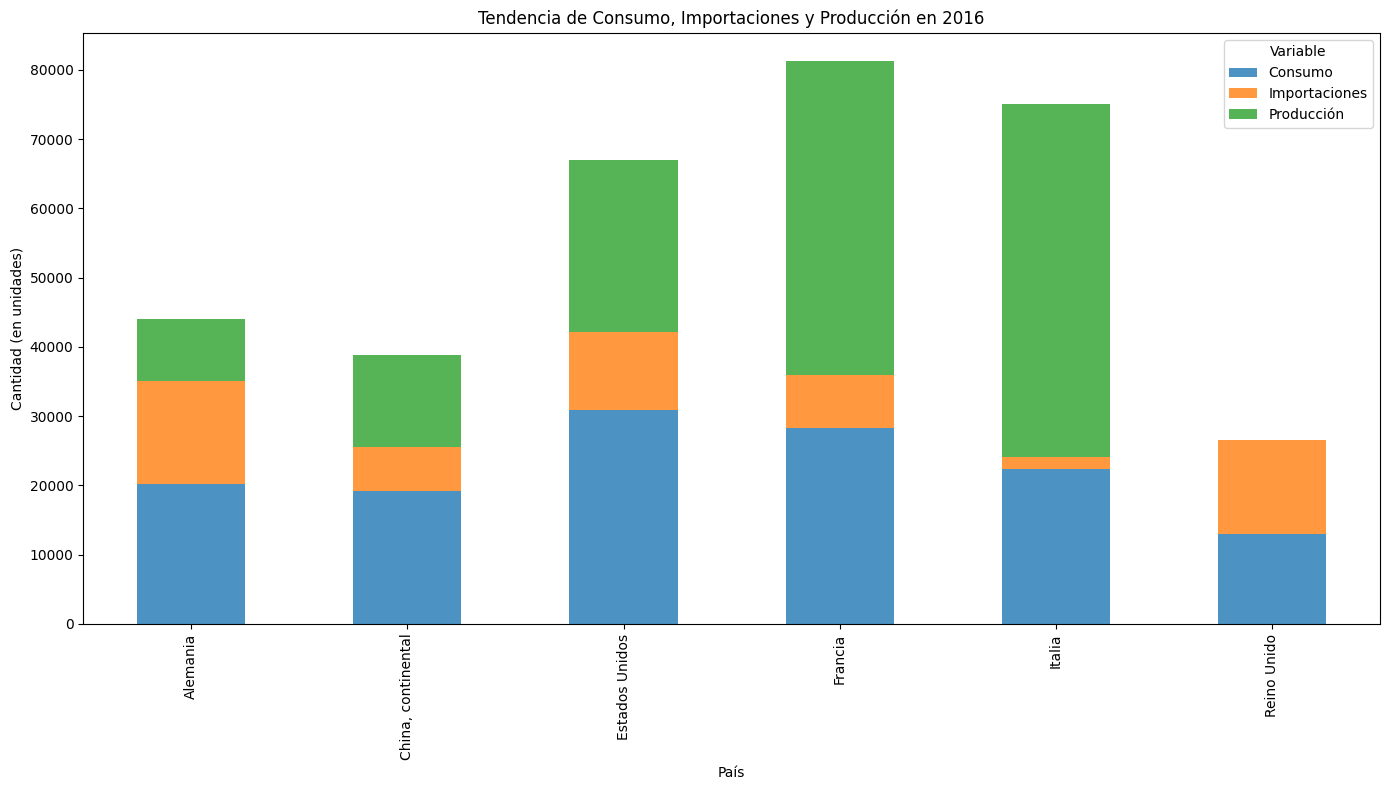

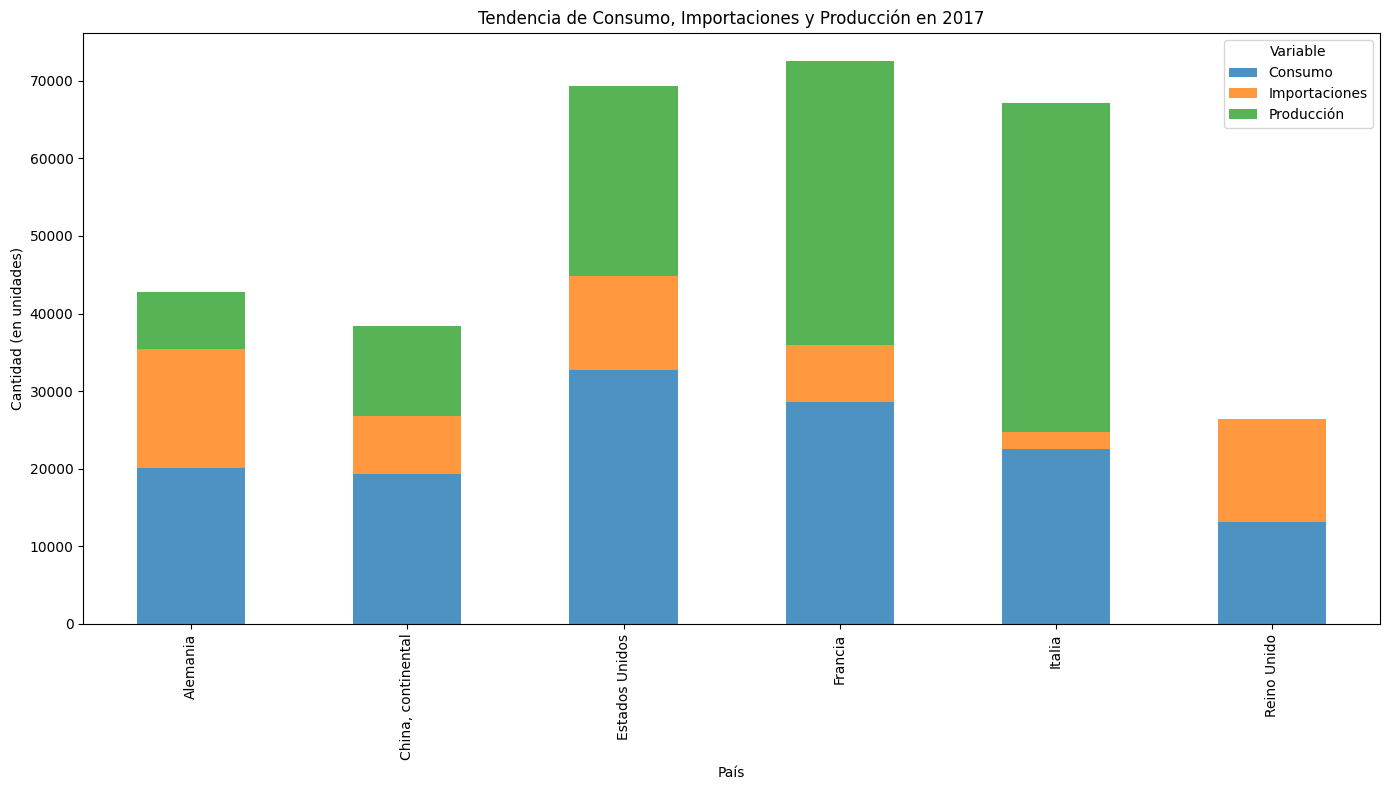

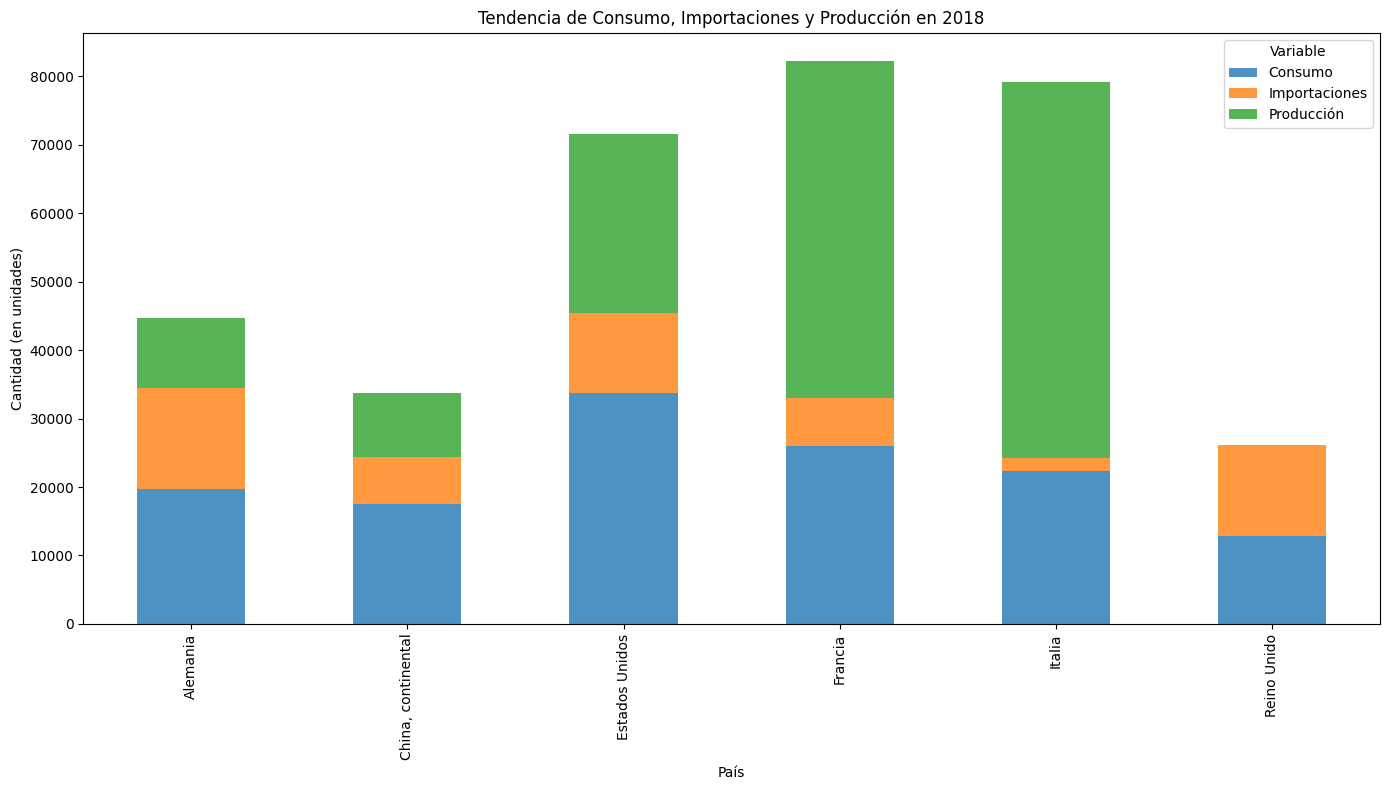

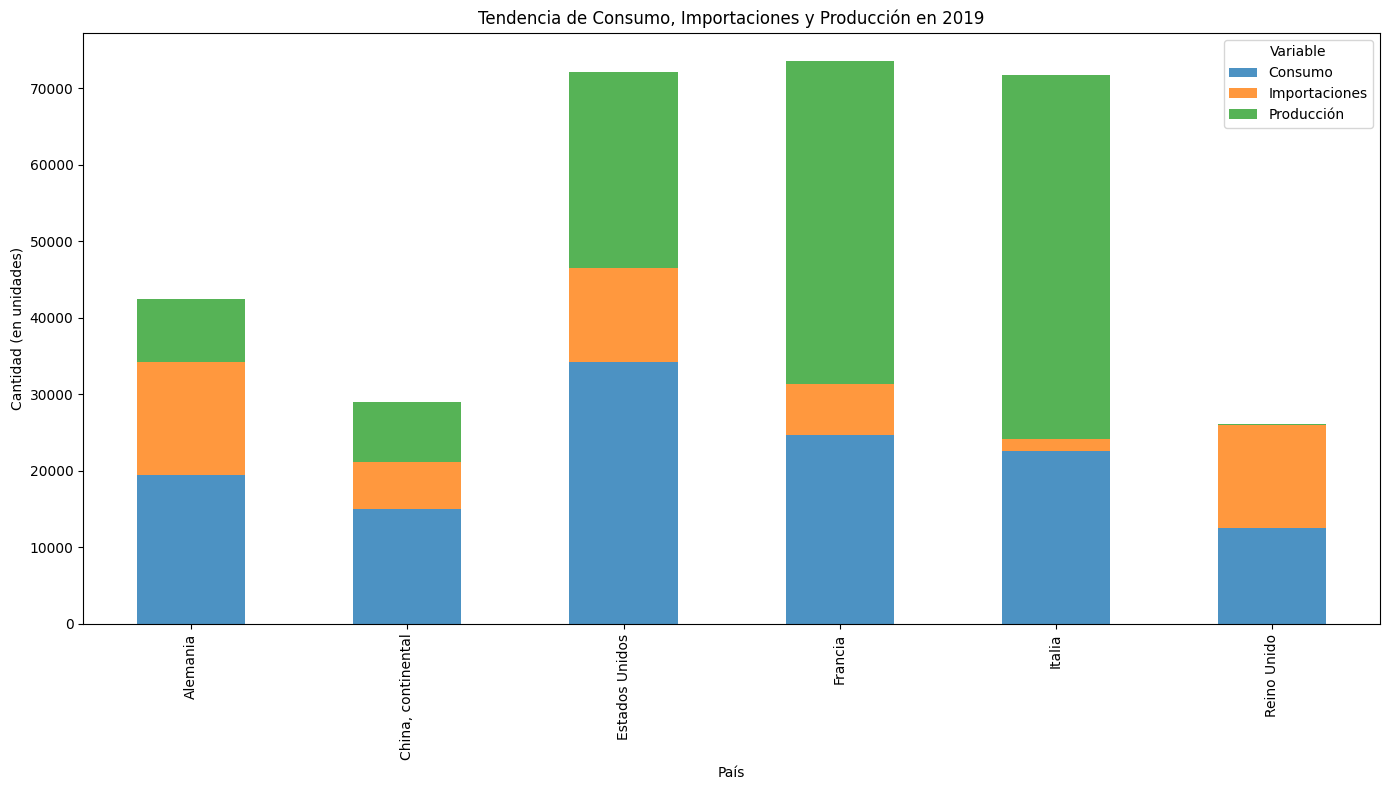

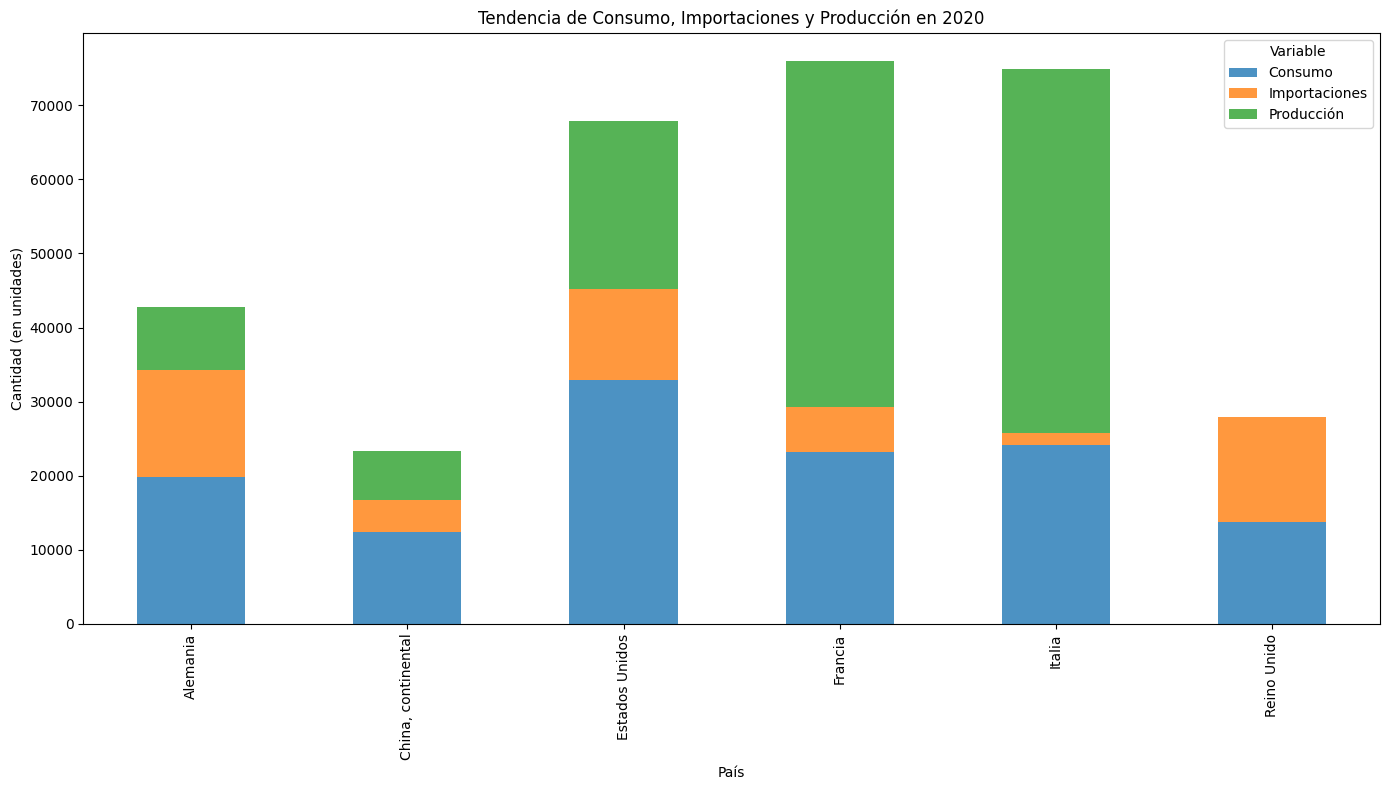

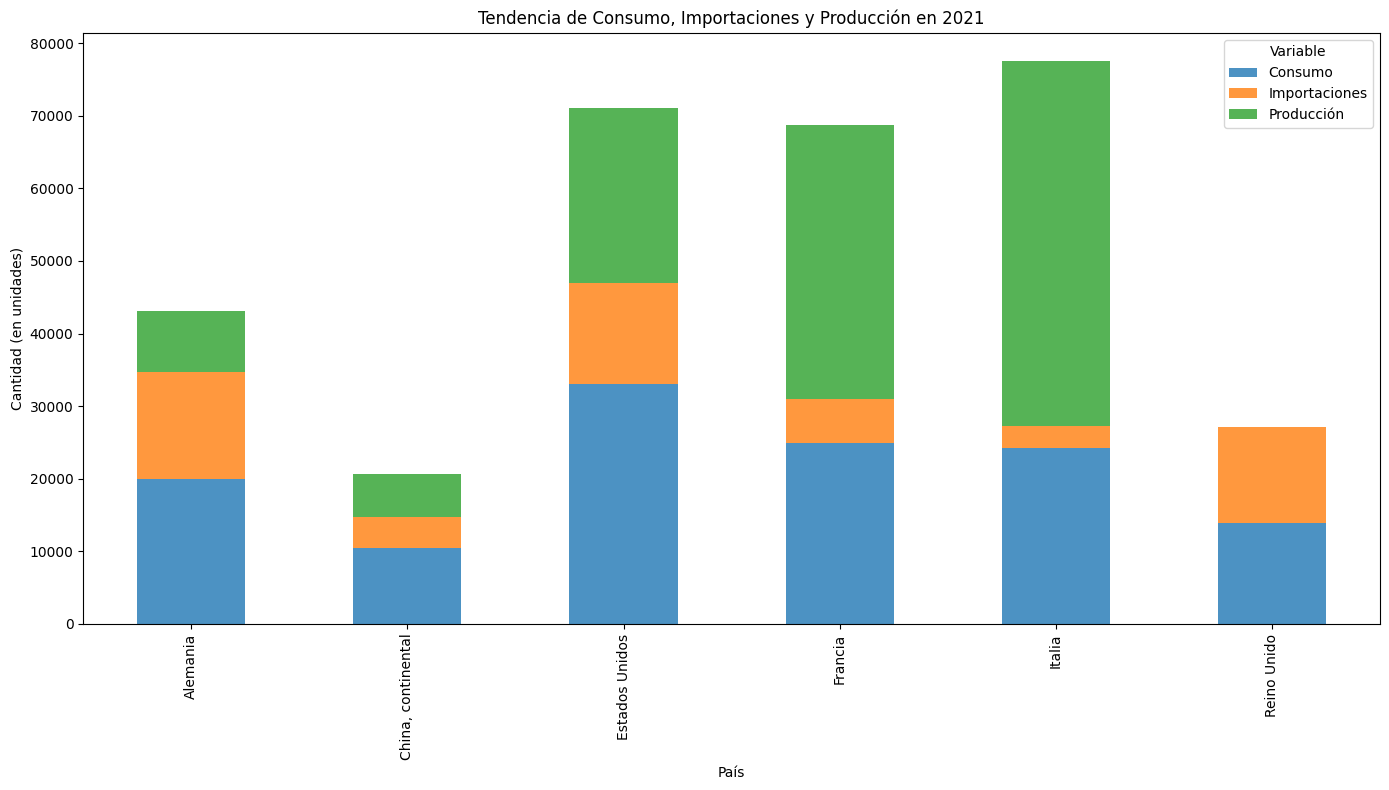

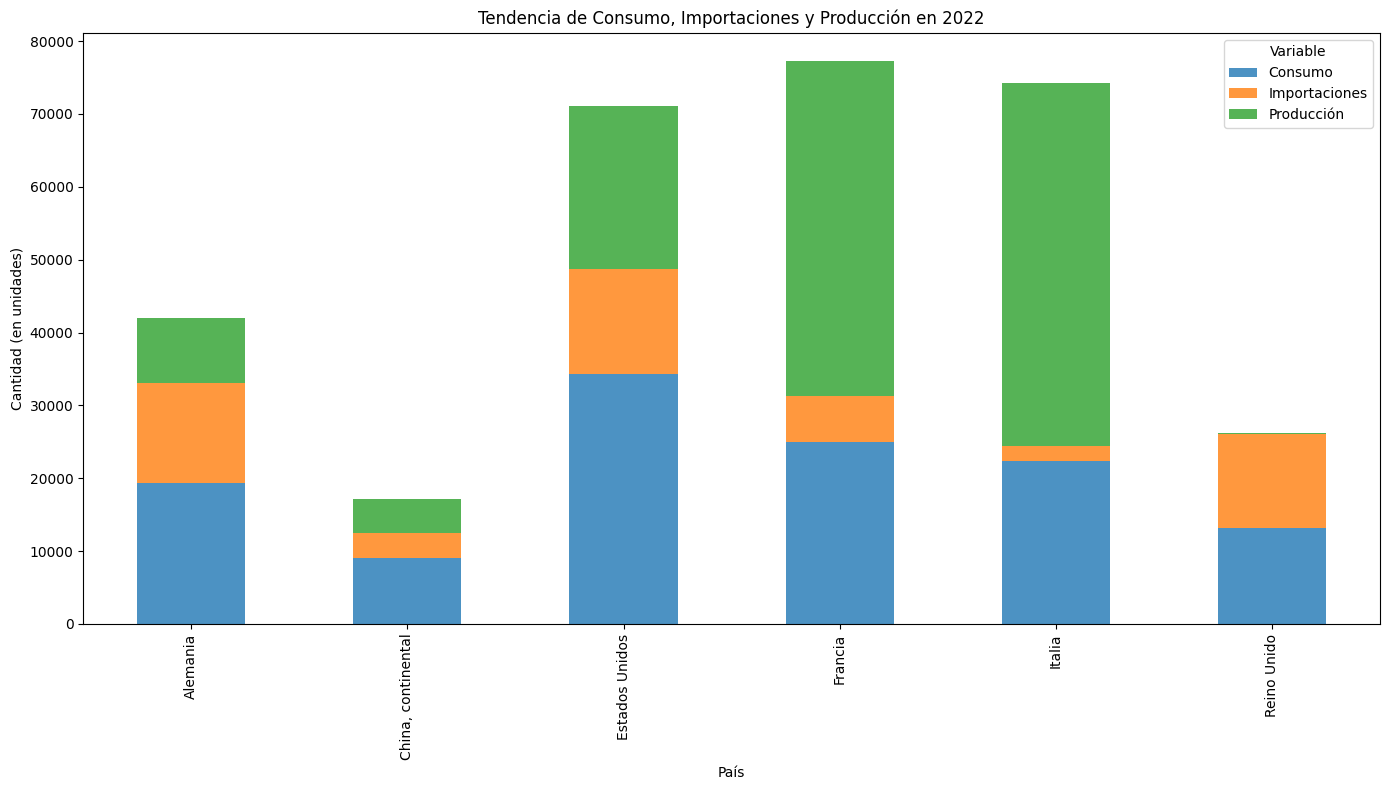

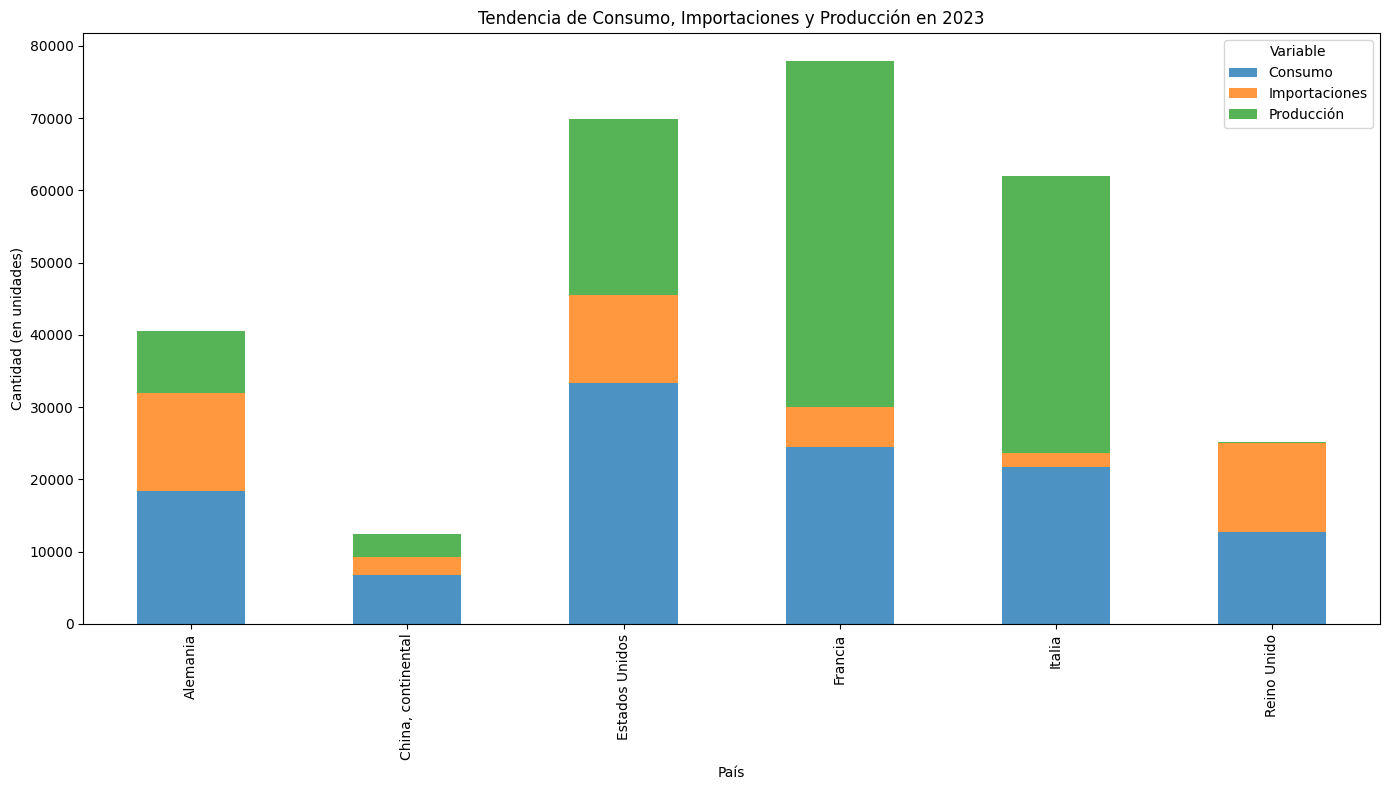

Datos detallados con porcentajes del mercado:
Variable  Year      Region/Country  Consumo_%  Importaciones_%  Producción_%
0         2013            Alemania  46.276342        34.648277     19.075381
1         2013  China, continental  51.734719        10.411080     37.854201
2         2013      Estados Unidos  46.212824        16.137625     37.649552
3         2013             Francia  36.594365         7.882877     55.522758
4         2013              Italia  26.831439         3.472607     69.695953
..         ...                 ...        ...              ...           ...
61        2023  China, continental  54.751240        19.916813     25.331947
62        2023      Estados Unidos  47.682024        17.554783     34.763193
63        2023             Francia  31.349089         7.178710     61.472200
64        2023              Italia  34.990970         3.265286     61.743744
65        2023         Reino Unido  50.517057        48.841079      0.641864

[66 rows x 5 columns]


In [19]:
# Filtrar datos relevantes: Consumo, Importaciones y Producción
variables_interes = ['Consumo', 'Importaciones', 'Producción']
df_relevante = dfvino[dfvino['Variable'].isin(variables_interes)]

# Identificar los Top 5 países en consumo por año
top_5_paises_por_ano = (
    df_relevante[df_relevante['Variable'] == 'Consumo']
    .groupby(['Year', 'Region/Country'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(by=['Year', 'Quantity'], ascending=[True, False])
    .groupby('Year')
    .head(5)['Region/Country']
    .unique()
)

# Filtrar solo los datos de los países identificados
df_top_5 = df_relevante[df_relevante['Region/Country'].isin(top_5_paises_por_ano)]

# Agrupar datos por año, país y variable
df_agrupado = (
    df_top_5.groupby(['Year', 'Region/Country', 'Variable'])['Quantity']
    .sum()
    .reset_index()
    .pivot(index=['Year', 'Region/Country'], columns='Variable', values='Quantity')
    .fillna(0)
    .reset_index()
)

# Calcular valores porcentuales de cada variable
df_agrupado['Total_Mercado'] = df_agrupado['Consumo'] + df_agrupado['Importaciones'] + df_agrupado['Producción']
df_agrupado['Consumo_%'] = (df_agrupado['Consumo'] / df_agrupado['Total_Mercado']) * 100
df_agrupado['Importaciones_%'] = (df_agrupado['Importaciones'] / df_agrupado['Total_Mercado']) * 100
df_agrupado['Producción_%'] = (df_agrupado['Producción'] / df_agrupado['Total_Mercado']) * 100

# Visualización: Gráfico de barras apiladas
plt.figure(figsize=(14, 8))

for year in df_agrupado['Year'].unique():
    df_year = df_agrupado[df_agrupado['Year'] == year]
    df_year.set_index('Region/Country')[['Consumo', 'Importaciones', 'Producción']].plot(
        kind='bar',
        stacked=True,
        figsize=(14, 8),
        alpha=0.8,
        title=f'Tendencia de Consumo, Importaciones y Producción en {year}',
    )
    plt.xlabel('País')
    plt.ylabel('Cantidad (en unidades)')
    plt.legend(title='Variable')
    plt.tight_layout()
    plt.show()

# Mostrar resultados con valores porcentuales
print("Datos detallados con porcentajes del mercado:")
print(df_agrupado[['Year', 'Region/Country', 'Consumo_%', 'Importaciones_%', 'Producción_%']])


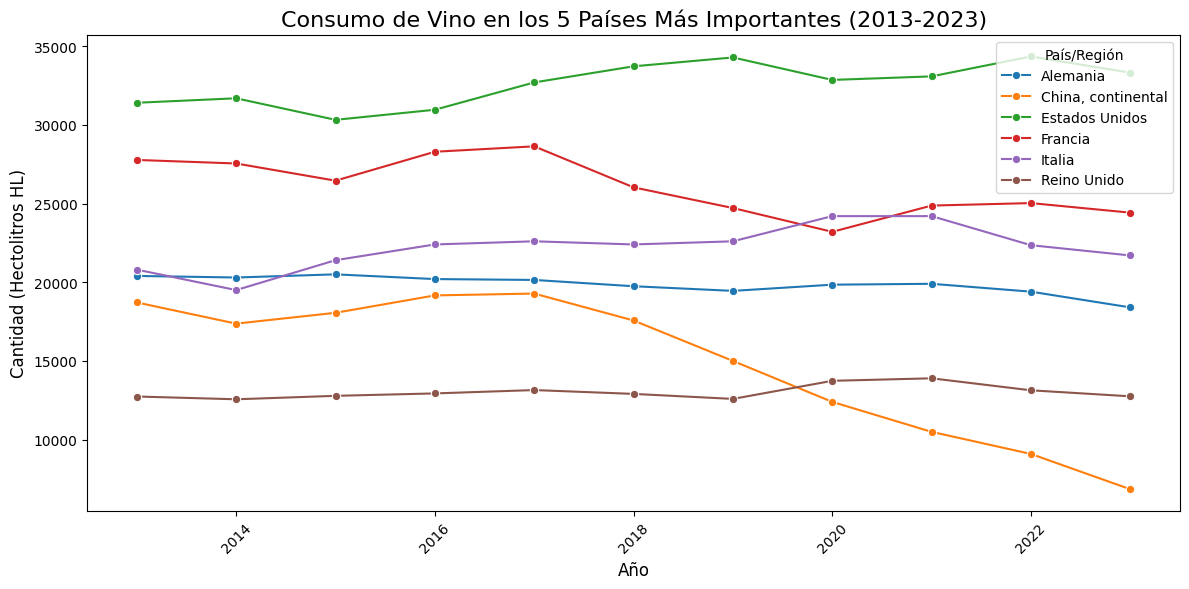

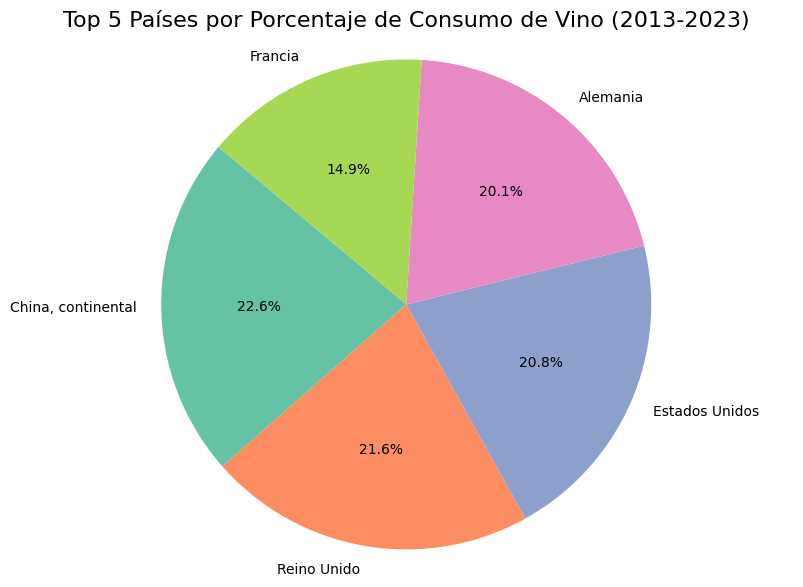

In [20]:
# Filtrar los datos de consumo del top 5 países
consumo_top_5 = df_top_5[df_top_5['Variable'] == 'Consumo']

# Crear un gráfico de líneas para mostrar el consumo de vino en estos 5 países a lo largo de la última década
plt.figure(figsize=(12, 6))
sns.lineplot(data=consumo_top_5, x='Year', y='Quantity', hue='Region/Country', marker='o')

# Configurar el gráfico
plt.title('Consumo de Vino en los 5 Países Más Importantes (2013-2023)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad (Hectolitros HL)', fontsize=12)
plt.legend(title='País/Región', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
# Agrupar los datos por país y sumar los porcentajes de consumo a lo largo de los años
consumo_por_pais = df_agrupado.groupby('Region/Country')['Consumo_%'].sum().sort_values(ascending=False)

# Seleccionar los top 5 países con mayor consumo total
top_5_consumo_paises = consumo_por_pais.head(5)

# Crear un gráfico de tarta para mostrar la porción del mercado de consumo de vino de los top 5 países
plt.figure(figsize=(10, 7))
plt.pie(top_5_consumo_paises, labels=top_5_consumo_paises.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

# Configurar el gráfico
plt.title('Top 5 Países por Porcentaje de Consumo de Vino (2013-2023)', fontsize=16)
plt.axis('equal')  # Asegurar que el gráfico de tarta sea un círculo

# Mostrar el gráfico
plt.show()

Para predecir el comportamiento del mercado en 2024 basado en en el consumo top 5 de la decada anterior

In [ ]:
%pip install scikit-learn

In [28]:
from sklearn.linear_model import LinearRegression

# Filtrar los datos de consumo del top 5 países
consumo_top_5 = df_top_5[df_top_5['Variable'] == 'Consumo']

# Crear un dataframe para almacenar las predicciones
predicciones_2024 = []

# Crear un modelo de regresión lineal para cada país y predecir el consumo en 2024
for pais in top_5_paises_por_ano:
    # Filtrar los datos del país
    datos_pais = consumo_top_5[consumo_top_5['Region/Country'] == pais]
    
    # Preparar los datos para el modelo
    X = datos_pais[['Year']]
    y = datos_pais['Quantity']
    
    # Crear y entrenar el modelo
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Predecir el consumo en 2024
    prediccion = modelo.predict([[2024]])
    
    # Almacenar la predicción en la lista
    predicciones_2024.append({'Region/Country': pais, 'Prediccion_Consumo_2024': prediccion[0]})

# Convertir la lista de predicciones a un DataFrame
predicciones_2024 = pd.DataFrame(predicciones_2024)

# Ordenar las predicciones para encontrar los top 5 países más recomendables para exportar vino
top_5_predicciones = predicciones_2024.sort_values(by='Prediccion_Consumo_2024', ascending=False).head(5)

# Mostrar los resultados
print("Top 5 países más recomendables para exportar vino en 2024:")
print(top_5_predicciones)

Top 5 países más recomendables para exportar vino en 2024:
   Region/Country  Prediccion_Consumo_2024
0  Estados Unidos             34450.800000
2          Italia             23717.890909
1         Francia             23596.090909
3        Alemania             18927.254545
5     Reino Unido             13381.636364


e:\Proyecto_Somelier\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\Proyecto_Somelier\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\Proyecto_Somelier\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\Proyecto_Somelier\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\Proyecto_Somelier\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\Proyecto_Somelier\Lib\site-packages\sklear